In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Charger le dataset
file_path = "World Energy Consumption.csv"  # Remplacez par le chemin de votre fichier
data = pd.read_csv(file_path)

# Colonnes pertinentes pour l'analyse
useful_columns = [
    'country', 'year', 'biofuel_consumption', 'coal_consumption',
    'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption',
    'nuclear_consumption', 'renewables_consumption', 'solar_consumption', 'wind_consumption'
]

# Vérifier les colonnes et filtrer les données
filtered_data = data.loc[:, useful_columns].copy()
filtered_data = filtered_data[filtered_data['country'] != 'World']  # Retirer le pays 'World'
filtered_data.fillna(0, inplace=True)

# Dictionnaire pour mapper les types d'énergie à des noms lisibles
energy_types = {
    'biofuel_consumption': "Biofuel",
    'coal_consumption': "Coal",
    'fossil_fuel_consumption': "Fossil Fuels",
    'gas_consumption': "Gas",
    'hydro_consumption': "Hydro",
    'nuclear_consumption': "Nuclear",
    'renewables_consumption': "Renewables",
    'solar_consumption': "Solar",
    'wind_consumption': "Wind"
}

# Initialiser les figures
fig_main = go.Figure()
fig_map = go.Figure()

# Ajouter les traces au graphique principal
for energy, energy_name in energy_types.items():
    visible = energy == 'biofuel_consumption'  # Par défaut, seule la consommation de biofuel est visible
    for country in filtered_data['country'].unique():
        country_data = filtered_data[filtered_data['country'] == country]
        fig_main.add_trace(go.Scatter(
            x=country_data['year'],
            y=country_data[energy],
            mode='lines',
            name=f"{country} ({energy_name})",
            legendgroup=energy_name,
            hoverinfo="name+y",
            visible=visible
        ))

# Ajouter les traces de la carte
for energy, energy_name in energy_types.items():
    map_data = filtered_data[filtered_data['year'] == 2020]
    fig_map.add_trace(go.Choropleth(
        locations=map_data['country'],
        locationmode="country names",
        z=map_data[energy],
        colorscale="Viridis",
        colorbar_title=f"{energy_name} Consumption (TWh)",
        hoverinfo="location+z",
        visible=(energy == 'biofuel_consumption')  # Par défaut, biofuel est visible
    ))

# Créer un menu pour les visualisations
buttons_main = []
buttons_map = []

for i, (energy, energy_name) in enumerate(energy_types.items()):
    visible_main = [False] * len(fig_main.data)
    visible_map = [False] * len(fig_map.data)

    # Activer uniquement les traces de l'énergie sélectionnée
    for j, trace in enumerate(fig_main.data):
        if trace.legendgroup == energy_name:
            visible_main[j] = True

    visible_map[i] = True

    buttons_main.append({
        "label": energy_name,
        "method": "update",
        "args": [
            {"visible": visible_main},
            {"title": f"Consommation mondiale d'énergie - {energy_name}"}
        ]
    })

    buttons_map.append({
        "label": energy_name,
        "method": "update",
        "args": [
            {"visible": visible_map},
            {"title": f"Carte de consommation mondiale d'énergie - {energy_name}"}
        ]
    })

# Appliquer les menus à chaque figure
fig_main.update_layout(
    updatemenus=[{
        "buttons": buttons_main,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.2,
        "yanchor": "top"
    }],
    title="Consommation mondiale d'énergie par type",
    xaxis_title="Année",
    yaxis_title="Consommation d'énergie (TWh)",
    hovermode="closest",
    height=600
)

fig_map.update_layout(
    updatemenus=[{
        "buttons": buttons_map,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.2,
        "yanchor": "top"
    }],
    title="Carte de consommation mondiale d'énergie par type",
    height=600
)

# Sauvegarder les graphiques dans des fichiers HTML séparés
output_main_path = "energy_main.html"
output_map_path = "energy_map.html"

fig_main.write_html(output_main_path)
fig_map.write_html(output_map_path)

print(f"Graphique principal exporté dans {output_main_path}.")
print(f"Carte interactive exportée dans {output_map_path}.")



1. Consommation maximale de biocarburant par habitant par pays:
            Country  Max Biofuel Consumption Per Capita
0     ASEAN (Ember)                                 NaN
1       Afghanistan                                 NaN
2            Africa                               0.810
3       Africa (EI)                                 NaN
4    Africa (Ember)                                 NaN
..              ...                                 ...
301           World                             150.369
302           Yemen                                 NaN
303      Yugoslavia                                 NaN
304          Zambia                                 NaN
305        Zimbabwe                                 NaN

[306 rows x 2 columns]

2. Normalisation des scores Z pour la demande en électricité (extrait):
         country  electricity_demand  electricity_demand_zscore
0  ASEAN (Ember)              368.65                        NaN
1  ASEAN (Ember)              397.19  

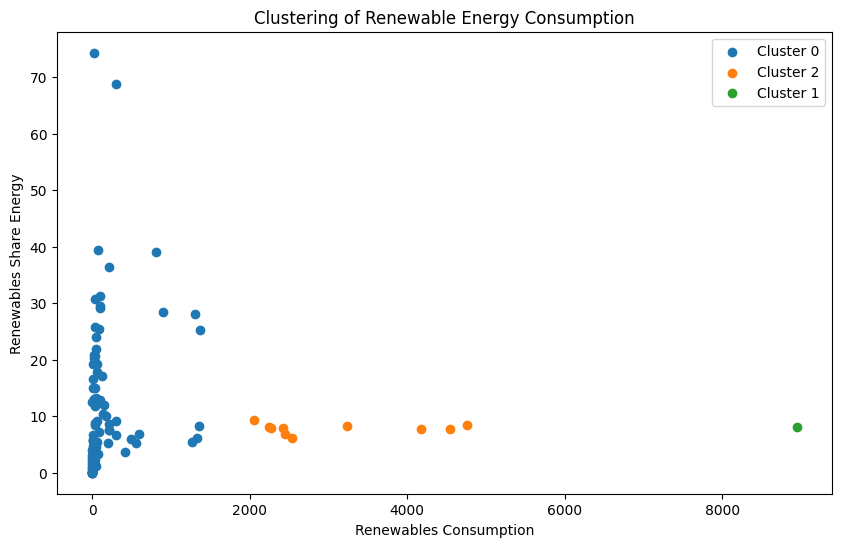

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger le dataset
file_path = 'World Energy Consumption.csv'  # Remplacez par le chemin de votre dataset
df = pd.read_csv(file_path)

# 1. Consommation maximale de biocarburant par habitant par pays
max_biofuel_per_capita = df.groupby('country')['biofuel_cons_per_capita'].max().reset_index()
max_biofuel_per_capita.columns = ['Country', 'Max Biofuel Consumption Per Capita']
print("\n1. Consommation maximale de biocarburant par habitant par pays:")
print(max_biofuel_per_capita)

# 2. Normalisation des scores Z pour la demande en électricité
df['electricity_demand_zscore'] = zscore(df['electricity_demand'])
print("\n2. Normalisation des scores Z pour la demande en électricité (extrait):")
print(df[['country', 'electricity_demand', 'electricity_demand_zscore']].head())

# 3. Indicateur temporel : Tendance de la demande en électricité au fil du temps
df_yearly = df.groupby('year')['electricity_demand'].sum().reset_index()
df_yearly['electricity_demand_pct_change'] = df_yearly['electricity_demand'].pct_change() * 100
print("\n3. Tendance de la demande en électricité au fil du temps:")
print(df_yearly)

# 4. Indicateur spatial : Clustering des énergies renouvelables
renewables_data = df.groupby('country')[['renewables_consumption', 'renewables_share_energy']].mean().dropna()
kmeans = KMeans(n_clusters=3, random_state=42).fit(renewables_data)
renewables_data['Cluster'] = kmeans.labels_
print("\n4. Clustering des énergies renouvelables:")
print(renewables_data)

# Visualisation des clusters spatiaux
plt.figure(figsize=(10, 6))
for cluster in renewables_data['Cluster'].unique():
    cluster_data = renewables_data[renewables_data['Cluster'] == cluster]
    plt.scatter(cluster_data['renewables_consumption'],
                cluster_data['renewables_share_energy'], label=f'Cluster {cluster}')
plt.title('Clustering of Renewable Energy Consumption')
plt.xlabel('Renewables Consumption')
plt.ylabel('Renewables Share Energy')
plt.legend()
plt.show()


1. Consommation maximale de biocarburant par habitant par pays
Description :
Ce tableau montre la consommation maximale de biocarburant par habitant pour chaque pays.
Observation principale :
Certaines régions et pays présentent des valeurs manquantes (NaN), indiquant l'absence de données pour ces entités.
Les pays ou groupes comme "World" affichent des valeurs élevées (150.369), tandis que des régions comme "Africa" ont une consommation plus modérée (0.810).
Implication :
Ces données peuvent être utilisées pour identifier les leaders ou retardataires en matière de consommation de biocarburant et établir des politiques pour promouvoir les biocarburants dans des régions spécifiques.
2. Normalisation des scores Z pour la demande en électricité
Description :
Les scores Z standardisent la demande en électricité, permettant de comparer les variations entre les pays indépendamment des échelles absolues.
Observation principale :
De nombreuses lignes affichent des valeurs NaN pour les scores Z, suggérant que certaines données pour ces pays ou régions sont identiques ou absentes.
Cela peut aussi indiquer un manque de variabilité significative dans la demande en électricité pour certaines entités.
Implication :
La normalisation permet de repérer les anomalies dans la consommation d'électricité. Cependant, il faudra explorer et traiter les valeurs manquantes pour garantir une analyse fiable.
3. Tendance de la demande en électricité au fil du temps
Description :
Ce tableau montre l'évolution annuelle de la demande mondiale en électricité ainsi que le pourcentage de variation par rapport à l'année précédente.
Observation principale :
Les premières années (1900 à 1904) montrent une demande nulle, probablement à cause de l'absence de données ou d'une faible consommation mondiale.
Entre 2018 et 2021, une croissance modérée est visible, avec un pic de +5.59% en 2021.
Une baisse importante de -31.67% est observée en 2022, possiblement due à des événements globaux comme la pandémie ou des chocs économiques.
Implication :
Cette analyse temporelle peut éclairer les décideurs politiques sur les périodes de forte demande ou de crises, et leur permettre d'anticiper les besoins futurs en infrastructure énergétique.
4. Clustering des énergies renouvelables
Description :
Les pays sont regroupés en 3 clusters basés sur leur consommation moyenne d'énergie renouvelable et leur part dans le mix énergétique.
Observation principale :
Cluster 0 : Comprend des pays avec une faible consommation renouvelable (ex. Algérie, Vietnam) et un faible pourcentage dans le mix énergétique.
Cluster 1 : Inclut des entités globales comme "World", caractérisées par une consommation élevée mais un faible pourcentage d'énergie renouvelable.
Cluster 2 : Inclut des régions comme "Asia" avec une consommation très élevée mais une part encore plus faible de renouvelables.
Implication :
Les clusters permettent d'identifier les modèles d'adoption des énergies renouvelables, facilitant ainsi la personnalisation des stratégies pour améliorer l'utilisation des énergies propres.
